# Analysis of Apartmets for Sale in Baku

---------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data.csv', converters={'Locations': pd.eval})
df.head(5)

,ID,Seller,Category,Locations,Price,Currency,Rooms,Area,Floor
0,2827728,Owner,Kohna tikili,"[Memar Acami m., Nasimi r., 4-cu mikrorayon q.]",89500,AZN,2,45.0,3
1,2760725,Agentlik,Yeni tikili,"[Binaqadi r., Bilacari q.]",75653,AZN,2,72.1,2
2,2872711,Owner,Yeni tikili,[Narimanov r.],155000,AZN,2,97.0,9
3,2881028,Agentlik,Yeni tikili,[Xatai r.],86500,AZN,2,71.0,5
4,2898312,Owner,Kohna tikili,"[Nizami r., 8-ci kilometr q.]",85000,AZN,2,45.0,2


In [3]:
pd.set_option('display.max_rows', None) # to display all rows completely

In [4]:
df.describe()

,ID,Price,Rooms,Area,Floor
count,2.784900e+04,2.784900e+04,27849.00000,27849.000000,27849.000000
mean,2.830468e+06,2.048658e+05,2.82854,119.518934,8.024848
std,2.217638e+05,1.829435e+05,0.95033,1259.504222,4.969964
min,2.494300e+04,9.900000e+01,1.00000,12.000000,1.000000
25%,2.840979e+06,1.100000e+05,2.00000,70.000000,4.000000
50%,2.887768e+06,1.580000e+05,3.00000,96.200000,7.000000
75%,2.903138e+06,2.400000e+05,3.00000,135.000000,12.000000
max,2.917435e+06,4.665000e+06,19.00000,161000.000000,27.000000


#### Remove duplicate rows if they exist

In [5]:
if len(df) - len(df['ID'].unique()) != 0:
    df = df.drop_duplicates(subset=['ID'])

#### Convert prices in USD to AZN if they exist

In [6]:
if 'USD' in df['Currency'].unique():
    df.loc[df['Currency'] == 'USD', 'Price'] = df['Price']*1.7
    df.loc[df['Currency'] == 'USD', 'Currency'] = 'AZN'

In [7]:
df['Locations'].explode().value_counts()

Yasamal r.               5523
Nasimi r.                4545
Xatai r.                 4298
Narimanov r.             3359
Nizami r.                1902
Binaqadi r.              1773
Yeni Yasamal q.          1272
Inshaatchilar m.         1266
Sabail r.                1192
Shah Ismayil Xatai m.    1164
Yasamal q.               1015
Ahmadli q.                989
Elmlar Akademiyasi m.     971
Nariman Narimanov m.      957
Hazi Aslanov m.           907
Memar Acami m.            894
28 May m.                 815
8-ci kilometr q.          732
Qara Qarayev m.           693
Nizami m.                 658
Ahmadli m.                634
20 Yanvar m.              595
9-cu mikrorayon q.        518
Neftchilar m.             498
Hazi Aslanov q.           470
8-ci mikrorayon q.        427
Ganclik m.                424
Sahil m.                  388
Xalqlar Dostlugu m.       378
Absheron r.               375
8 Noyabr m.               373
4-cu mikrorayon q.        347
Sabunchu r.               343
Azadliq Pr

In [93]:
# locs = df['Locations'].explode().value_counts()

# locs = dict(locs)
# lists = sorted(locs.items()) # sorted by key, return a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.figure(figsize=(10,20))
# plt.barh(x, y)
# plt.title("Num of Houses in each region")
# plt.xlabel("Counts")
# plt.ylabel("Regions")
# plt.show()

In [68]:
df['PPSM'] = (df['Price']/df['Area']).astype(int) # Price Per Square Meter

In [36]:
def get_station(loc):
    for x in loc:
        if 'm.' in x:
            return x
    return np.nan

df['Station'] = df['Locations'].apply(lambda x: get_station(x))

In [33]:
def get_region(loc):
    for x in loc:
        if 'r.' in x:
            return x
    return np.nan

df['Region'] = df['Locations'].apply(lambda x: get_region(x))

In [34]:
def get_district(loc):
    for x in loc:
        if 'q.' in x:
            return x
    return np.nan

df['District'] = df['Locations'].apply(lambda x: get_district(x))

In [69]:
df.head(5)

,ID,Seller,Category,Locations,Price,Currency,Rooms,Area,Floor,Station,Region,District,PPSM
0,2827728,Owner,Kohna tikili,"[Memar Acami m., Nasimi r., 4-cu mikrorayon q.]",89500,AZN,2,45.0,3,Memar Acami m.,Nasimi r.,4-cu mikrorayon q.,1988
1,2760725,Agentlik,Yeni tikili,"[Binaqadi r., Bilacari q.]",75653,AZN,2,72.1,2,NaN,Binaqadi r.,Bilacari q.,1049
2,2872711,Owner,Yeni tikili,[Narimanov r.],155000,AZN,2,97.0,9,NaN,Narimanov r.,NaN,1597
3,2881028,Agentlik,Yeni tikili,[Xatai r.],86500,AZN,2,71.0,5,NaN,Xatai r.,NaN,1218
4,2898312,Owner,Kohna tikili,"[Nizami r., 8-ci kilometr q.]",85000,AZN,2,45.0,2,NaN,Nizami r.,8-ci kilometr q.,1888


In [40]:
stations_counts = df['Station'].value_counts()
regions_counts = df['Region'].value_counts()
districts_counts = df['District'].value_counts()

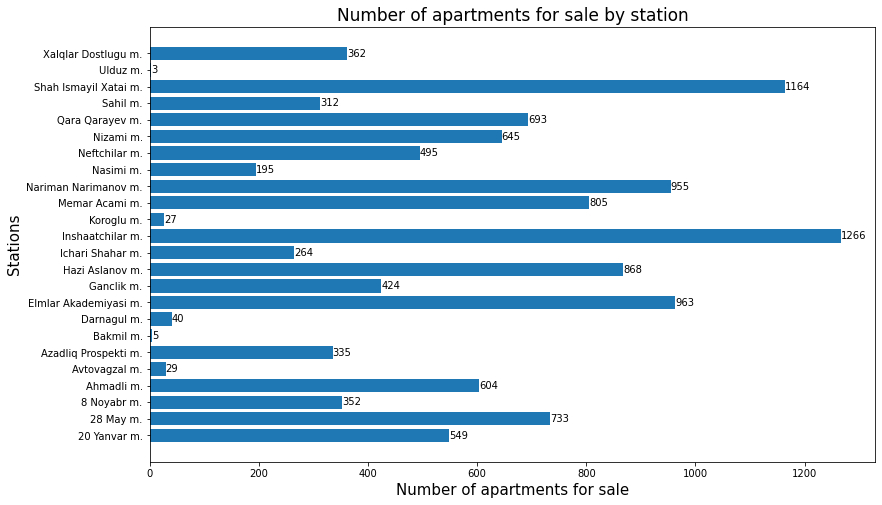

In [91]:
x, y = zip(*sorted(dict(stations_counts).items()))

plt.figure(figsize=(13,8))
bars = plt.barh(x, y)
plt.bar_label(bars, y)
plt.title("Number of apartments for sale by station", size=17)
plt.xlabel("Number of apartments for sale", size=15)
plt.ylabel("Stations", size=15)
plt.show()

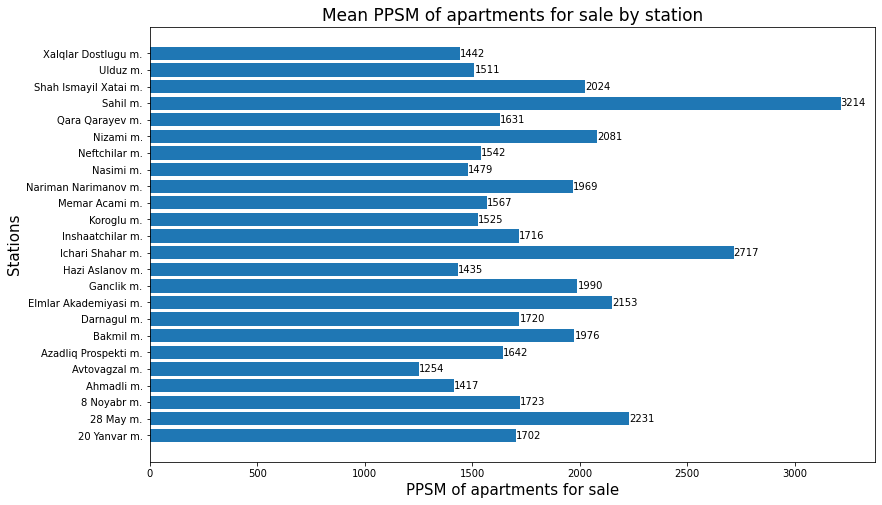

In [92]:
stations_prices = df.groupby('Station').mean()['PPSM'].astype(int)

x, y = zip(*sorted(dict(stations_prices).items()))

plt.figure(figsize=(13,8))
bars = plt.barh(x, y)
plt.bar_label(bars, y)
plt.title("Mean PPSM of apartments for sale by station", size=17)
plt.xlabel("PPSM of apartments for sale", size=15)
plt.ylabel("Stations", size=15)

plt.show()